# План симуляций
0. Превышение критической энергии, условие  возникновения лавины.
1. Симуляции паратметров электронной лавины без учета гамма-квантов
2. Расчет длинны нарастания лавины для разных высот и полей (делая поправку для поля на высоту)
3. Расчет средней энергии электронов, спектра электронов, зависимости от начальной энергии




In [23]:
from dataclasses import dataclass
import numpy as np
import matplotlib.pyplot as plt
import tables
import matplotlib as mpl

In [33]:
path = "/home/zelenyy/data/thunderstorm/test/result.hdf5"
path = "/mnt/storage2/phd/data/thunderstorm/critical_energy/result.hdf5"

In [3]:
with tables.open_file(path) as h5file:
    # print(h5file)
    for group in h5file.root:
        table = h5file.get_node(group, "stacking_simple")
        print(repr(table.attrs))
        data = table.read()
        break

/sim0000/stacking_simple._v_attrs (AttributeSet), 32 attributes:
   [CLASS := 'TABLE',
    FIELD_0_FILL := 0,
    FIELD_0_NAME := 'event',
    FIELD_1_FILL := 0,
    FIELD_1_NAME := 'id',
    FIELD_2_FILL := 0,
    FIELD_2_NAME := 'parent_id',
    FIELD_3_FILL := 0,
    FIELD_3_NAME := 'particle',
    FIELD_4_FILL := 0.0,
    FIELD_4_NAME := 'energy',
    FIELD_5_FILL := 0.0,
    FIELD_5_NAME := 'theta',
    FIELD_6_FILL := 0.0,
    FIELD_6_NAME := 'radius',
    FIELD_7_FILL := 0.0,
    FIELD_7_NAME := 'z',
    FIELD_8_FILL := 0.0,
    FIELD_8_NAME := 'time',
    NROWS := 0,
    TITLE := '',
    VERSION := '2.7',
    path := 'sim0000',
    text := '/npm/geometry/type gdml\n/npm/geometry/gdml .././gdml/0.gdml\n/npm/thunderstorm/physics standard_opt_4\n/npm/thunderstorm/minimal_energy 0.10220286877494192 MeV\n/npm/thunderstorm/stacking/electron false\n/npm/thunderstorm/stacking/positron false\n/npm/thunderstorm/stacking/gamma false\n/npm/thunderstorm/stacking/save_gamma false\n/npm/thund

In [4]:
bins = np.arange(0.001, 2, 0.001)


In [24]:
@dataclass
class CEData:
    number : int
    energy : float
    hist : np.ndarray

def get_data(path, field = 0.0, height = 0.0):
    result = []
    bins = np.arange(0.001, 2, 0.001)
    with tables.open_file(path) as h5file:
        for group in h5file.root:
            table = h5file.get_node(group, "stacking_simple")
            m_field = table.attrs["values_gdml_field"][0]
            m_height = table.attrs["values_gdml_height"][0]
            if np.isclose([m_field, m_height], [field, height]).all():
                data = table.read()
                energy =  table.attrs["values_macros_energy"]
                number =  table.attrs["values_macros_number"]
                hist, _ = np.histogram(data["energy"], bins=bins)
                result.append(CEData(number, energy, hist))
    return result, bins

In [41]:
ce_list, bins = get_data(path, field=3e-4)

In [42]:
ce_list = sorted(ce_list, key=lambda x: x.energy)

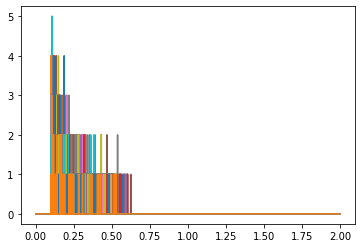

In [43]:
for item in ce_list:
    plt.step(bins[:-1], item.hist)

In [44]:
for item in ce_list:
    print((item.hist != 0).sum()/item.number, ce_list.index(item))

0.04 0
0.07 1
0.09 2
0.08 3
0.09 4
0.06 5
0.07 6
0.09 7
0.11 8
0.08 9
0.14 10
0.11 11
0.06 12
0.1 13
0.09 14
0.09 15
0.07 16
0.1 17
0.12 18
0.05 19
0.12 20
0.11 21
0.13 22
0.11 23
0.1 24
0.12 25
0.07 26
0.12 27
0.1 28
0.08 29
0.12 30
0.16 31
0.09 32
0.15 33
0.12 34
0.11 35
0.14 36
0.14 37
0.12 38
0.12 39
0.17 40
0.13 41
0.15 42
0.15 43
0.13 44
0.16 45
0.14 46
0.1 47
0.1 48
0.1 49
0.17 50
0.15 51
0.16 52
0.13 53
0.11 54
0.19 55
0.12 56
0.14 57
0.24 58
0.14 59
0.11 60
0.15 61
0.15 62
0.1 63
0.15 64
0.11 65
0.15 66
0.21 67
0.18 68
0.17 69
0.19 70
0.14 71
0.22 72
0.19 73
0.17 74
0.24 75
0.19 76
0.16 77
0.25 78
0.21 79
0.14 80
0.25 81
0.22 82
0.13 83
0.21 84
0.21 85
0.2 86
0.26 87
0.15 88
0.22 89
0.17 90
0.2 91
0.19 92
0.28 93
0.25 94
0.13 95
0.17 96
0.15 97
0.26 98
0.19 99
0.23 100
0.13 101
0.19 102
0.19 103
0.23 104
0.26 105
0.16 106
0.19 107
0.2 108
0.27 109
0.19 110
0.17 111
0.21 112
0.22 113
0.26 114
0.22 115
0.14 116
0.16 117
0.25 118
0.17 119
0.25 120
0.15 121
0.28 122
0.26 123
0.16 

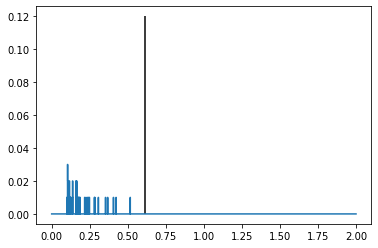

In [45]:
item = ce_list[-1]
n = 100
plt.step(bins[:-1], item.hist/item.number)
plt.vlines(item.energy, 0, 0.12)